In [4]:
#pip install kneed
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *
import pandas as pd
from fastai.tabular.all import *


/Users/romainbaud/opt/anaconda3/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


# USERS

Here we will find the most similar users based on KMEANS and consolidate this information with our user data

In [2]:
# cleaning users 
users = pd.read_excel('users.xlsx')
users.drop(columns=['likes','dislikes','badges','avatar_url','password','username','actions'], inplace=True)
users = pd.get_dummies(users, columns=['eating_habits','garden','transportation'])
users.head(5)

,user_id,level,involvement,eating_habits_omnivore,eating_habits_vegan,eating_habits_vegetarian,garden_jardin,garden_non,garden_terrasse,transportation_transports,transportation_velo,transportation_voiture
0,0,5,0,0,0,1,1,0,0,0,0,1
1,1,2,1,0,0,1,0,0,1,0,1,0
2,2,3,2,0,1,0,0,1,0,0,1,0
3,3,4,3,0,1,0,1,0,0,0,0,1
4,4,8,4,1,0,0,0,1,0,0,0,1


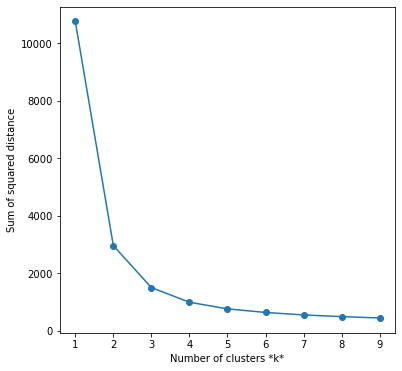

In [3]:
# model evaluation with elbow method (to choose a k)
# picking the k were the elbow appears (strongest decrease followed by smallest decrease)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(users)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [4]:
from kneed import KneeLocator
kn_users = KneeLocator(list_k, sse, curve='convex', direction='decreasing')
print(kn_users.knee)

3


In [5]:
#consolider users avec groupes (classification )
kmeans_users = KMeans(n_clusters=kn_users.knee).fit(users)
kmeans_users.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
#users final dataset 
users['user_group_kmeans'] = kmeans_users.labels_
users.head(5)

,user_id,level,involvement,eating_habits_omnivore,eating_habits_vegan,eating_habits_vegetarian,garden_jardin,garden_non,garden_terrasse,transportation_transports,transportation_velo,transportation_voiture,user_group_kmeans
0,0,5,0,0,0,1,1,0,0,0,0,1,2
1,1,2,1,0,0,1,0,0,1,0,1,0,2
2,2,3,2,0,1,0,0,1,0,0,1,0,2
3,3,4,3,0,1,0,1,0,0,0,0,1,2
4,4,8,4,1,0,0,0,1,0,0,0,1,2


# Actions

Here we will find the most similar actions based on KMEANS and consolidate this information with our action data

In [7]:
# cleaning actions 
actions = pd.read_excel('Liste_actions.xlsx')
actions = pd.get_dummies(actions, columns=['category'])
actions.drop(columns=['action_image','action_title','action_impact','action_description','sources','disliked_by','liked_by','comments',], inplace=True)

actions

,action_id,rating,top_action,pour_omnivore,pour_terrasse,pour_voiture,category_Achats / Conso,category_Alimentation,category_Autonomie / DIY,category_Déchets,category_Energie,category_Good news,category_Numérique,category_Point culture,category_Transport,category_ads
0,760590,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,804263,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,540334,10,1,1,1,1,0,0,0,0,0,0,0,0,1,0
3,340622,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,903639,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,50864,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
162,54491,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0
163,41810,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
164,5465,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0


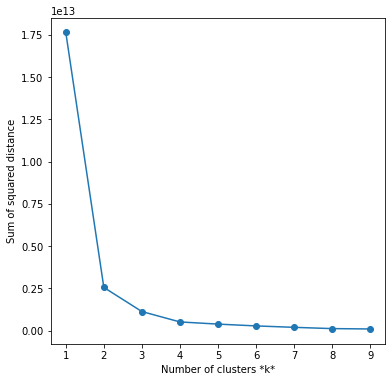

In [8]:
# model evaluation with elbow method (to choose a k)
# picking the k were the elbow appears (strongest decrease followed by smallest decrease)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(actions)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [10]:
from kneed import KneeLocator
kn_actions = KneeLocator(list_k, sse, curve='convex', direction='decreasing')
print(kn_actions.knee)

2


In [11]:
# consolider actions avec groupes d'action (classification)
kmeans_actions = KMeans(n_clusters=kn_actions.knee).fit(actions)
kmeans_actions.labels_

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
#actions final dataset 
actions['action_group_kmeans'] = kmeans_actions.labels_
actions

,action_id,rating,top_action,pour_omnivore,pour_terrasse,pour_voiture,category_Achats / Conso,category_Alimentation,category_Autonomie / DIY,category_Déchets,category_Energie,category_Good news,category_Numérique,category_Point culture,category_Transport,category_ads,action_group_kmeans
0,760590,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,804263,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,540334,10,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1
3,340622,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,903639,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,50864,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
162,54491,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
163,41810,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
164,5465,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# TRAINING THE TABULAR MODEL


We create a dataset with all interactions between users and actions

In [30]:
# cleaning users 
done = pd.read_excel('users.xlsx')
done.drop(columns=['likes','dislikes','badges','avatar_url','password','username','level','eating_habits','garden','transportation','involvement'], inplace=True)
done['actions'] = done['actions'].str.strip(',').str.split('\s*,\s*')
done = pd.DataFrame(list(zip(done['actions'].explode().keys(), done['actions'].explode())), columns =['user_id', 'action_id'])
done['action_id'] = ["%s" % x.strip()[5:] for x in done['action_id']]
done.head(5)


,user_id,action_id
0,0,430051
1,0,683393
2,0,663450
3,0,635551
4,1,641034


In [31]:
# consolidating information with user data 

users = pd.read_excel('users.xlsx').drop(columns=['likes','dislikes','badges','avatar_url','password','username','actions'])
users = pd.get_dummies(users, columns=['eating_habits','garden','transportation'])
done = done.join(users, how='left', rsuffix='_userinfo', on='user_id')
done.head(5)

,user_id,action_id,user_id_userinfo,level,involvement,eating_habits_omnivore,eating_habits_vegan,eating_habits_vegetarian,garden_jardin,garden_non,garden_terrasse,transportation_transports,transportation_velo,transportation_voiture
0,0,430051,0,5,0,0,0,1,1,0,0,0,0,1
1,0,683393,0,5,0,0,0,1,1,0,0,0,0,1
2,0,663450,0,5,0,0,0,1,1,0,0,0,0,1
3,0,635551,0,5,0,0,0,1,1,0,0,0,0,1
4,1,641034,1,2,1,0,0,1,0,0,1,0,1,0


In [32]:
# consolidating information with action data
actions = pd.get_dummies(pd.read_excel('Liste_actions.xlsx').drop(columns=['action_impact','action_title','action_image','sources','comments','liked_by','disliked_by']), columns=['category'])
actions['action_id'] = ["%s" % x for x in actions['action_id']]
done = done.merge(actions, how='left', on='action_id')
done

,user_id,action_id,user_id_userinfo,level,involvement,eating_habits_omnivore,eating_habits_vegan,eating_habits_vegetarian,garden_jardin,garden_non,...,category_Achats / Conso,category_Alimentation,category_Autonomie / DIY,category_Déchets,category_Energie,category_Good news,category_Numérique,category_Point culture,category_Transport,category_ads
0,0,430051,0,5,0,0,0,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,683393,0,5,0,0,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,663450,0,5,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,635551,0,5,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,641034,1,2,1,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,48,054555,48,4,3,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,49,238840,49,8,4,1,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,49,843726,49,8,4,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
198,49,400377,49,8,4,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [194]:
#manually entering ratings for training the model at first
done.to_excel('done.xlsx')

# Tabular

In [15]:
# loading the first ratings
tabular = pd.read_excel('done_ratings.xlsx')
action_ids = tabular['action_id']
tabular.drop(columns=['action_description','action_id'], inplace=True)
tabular

,user_id,ratings,level,involvement,eating_habits_omnivore,eating_habits_vegan,eating_habits_vegetarian,garden_jardin,garden_non,garden_terrasse,...,pour_voiture,category_Achats / Conso,category_Alimentation,category_Autonomie / DIY,category_Déchets,category_Energie,category_Good news,category_Numérique,category_Point culture,category_Transport
0,0,8,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,7,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,8,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,5,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,23,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,23,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,16,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# preparing the dataset for learning (creation of validation and training set)

splits = RandomSplitter(valid_pct=0.2)(range_of(tabular))

to = TabularPandas(tabular, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['user_id',
       'eating_habits_omnivore', 'eating_habits_vegan',
       'eating_habits_vegetarian', 'garden_jardin', 'garden_non',
       'garden_terrasse', 'transportation_transports', 'transportation_velo',
       'transportation_voiture','top_action',
       'pour_omnivore', 'pour_terrasse', 'pour_voiture',
       'category_Achats / Conso', 'category_Alimentation',
       'category_Autonomie / DIY', 'category_Déchets', 'category_Energie',
       'category_Good news', 'category_Numérique', 'category_Point culture',
       'category_Transport','level', 'involvement', 'rating'],
                   #cont_names = [],
                   y_names='ratings',
                   splits=splits)

In [17]:
# training the model 

dls = to.dataloaders(bs=64)
learn = tabular_learner(dls, metrics=accuracy, y_range=(0,10))
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,7.322578,4.837187,0.036364,00:00
1,7.060197,4.857229,0.036364,00:00
2,6.107253,4.887788,0.036364,00:00
3,5.490192,4.923238,0.036364,00:00
4,4.978294,4.963603,0.036364,00:00


In [33]:
# be careful here, most results are at 5
learn.show_results()

,user_id,eating_habits_omnivore,eating_habits_vegan,eating_habits_vegetarian,garden_jardin,garden_non,garden_terrasse,transportation_transports,transportation_velo,transportation_voiture,top_action,pour_omnivore,pour_terrasse,pour_voiture,category_Achats / Conso,category_Alimentation,category_Autonomie / DIY,category_Déchets,category_Energie,category_Good news,category_Numérique,category_Point culture,category_Transport,level,involvement,rating,ratings,ratings_pred
0,17,2,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,3,2,2,10,4.587999
1,43,2,1,1,2,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,5,10,9,4.584804
2,25,2,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,5,9,4,4.593636
3,18,2,1,1,1,1,2,2,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,2,3,5,5,4.598953
4,43,2,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,5,5,5,4.590003
5,33,2,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,4,4,5,5,4.593733
6,21,1,2,1,1,2,1,1,2,1,2,2,2,2,2,1,1,1,1,1,1,1,1,2,3,9,2,4.576367
7,37,1,1,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,4,1,1,5,4.589421
8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4.582325


In [ ]:
# save tabular model 
learn.export('learner.pkl', pickle_module=pickle, pickle_protocol=2)

In [ ]:
# load tabular model 
learn2 = load_learner('learner.pkl',  pickle_module=pickle)

In [19]:

# With this we can have an approximation of rating for one user and one action based on interactions
row, pred, probs = learn.predict(tabular.iloc[0])
float(pred[0])

4.582263946533203

In [115]:
#defining the conditions for ratings 
def rating(line):
    
    #if user doesn't eat meat and action speaks about meat
    if line[17] == 1 and (line[4] == 1 or line[5] == 1):
        return 0 
    
    #if user doesn't have a garden and action requires one 
    if line[18] == 1 and line[7]==1:
        return 0 
    
    #if user doesn't have a car and action requires one 
    if line[19] == 1 and line[10]==0:
        return 0 
    
    #else apply model 
    row, pred, probs = learn.predict(line)
    prediction = float(pred[0])
    
    return prediction 

dataset['rating'] = list(map(rating, dataset.values))

# RECOMMENDER

In [20]:
from fastai import *
from fastai.collab import *
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Read the data and display the same
data = pd.read_excel('done_ratings.xlsx')[['user_id','action_id','ratings']]
data['action_id'] = [x.strip()[5:] for x in data['action_id']]

data.head()


,user_id,action_id,ratings
0,0,430051,8
1,0,683393,7
2,0,663450,4
3,0,635551,8
4,1,641034,5


In [21]:
dloader = CollabDataLoaders.from_df(data, user_name = "user_id", item_name = "action_id", rating_name = "ratings", valid_pct = .1)
dloader.show_batch()

,user_id,action_id,ratings
0,5,651408,8
1,49,651408,2
2,39,641034,3
3,10,2921,5
4,6,43403,7
5,17,38224,4
6,37,683393,3
7,40,9425,10
8,10,941760,1
9,31,16530,5


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.03981071710586548)

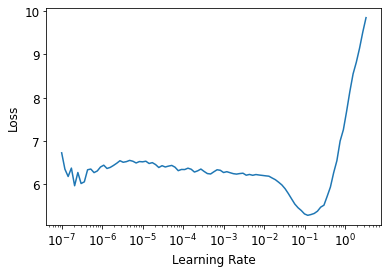

In [22]:
learn = collab_learner(dls = dloader, n_factors = 40, y_range = (0, 10))
learn.lr_find()

In [23]:
learn.fit_one_cycle(n_epoch = 5, lr_max = 0.01, wd = 1e-2)

epoch,train_loss,valid_loss,time
0,6.115688,4.868077,00:00
1,6.087936,4.922506,00:00
2,6.056347,4.953381,00:00
3,6.052185,4.971982,00:00
4,5.957514,4.978312,00:00


In [24]:
learn.export("./Embedding_Dot_Bias_Recommender_model3.pkl")

In [ ]:
# loadign the model 
from fastai.tabular.all import *
learn_prod = load_learner('./Embedding_Dot_Bias_Recommender_model3.pkl',  pickle_module=pickle)

In [ ]:
# loading action info
import numpy
action_ids =["%s" % x for x in pd.read_excel('Liste_actions.xlsx')["action_id"]]
# action_ids =[x.strip()[5:] for x in pd.read_excel('Liste_actions.xlsx')["action_id"]]
action_ids = numpy.array(action_ids, dtype=object)
action_ids

In [ ]:
# loading user info
import pandas as pd
users = pd.read_excel('users.xlsx')['user_id']

In [ ]:
# calculating user weight
user_weights = []
for user in users:
    user_weights.append(learn_prod.model.weight([user], is_item = False).cpu().numpy())
user_weights = numpy.array(user_weights)

from numpy import savetxt
savetxt('users_weights.csv', actions_weight, delimiter=',')


In [ ]:
# calculating actions weights 
actions_weight = learn_prod.model.weight(action_ids, is_item = True)
actions_weight = actions_weight.cpu().numpy()
actions_weight

from numpy import savetxt
savetxt('action_weights.csv', actions_weight, delimiter=',')

source : https://github.com/ElisonSherton/Collaborative-Filtering-On-Anime-Dataset/blob/master/AnimeRecommendation.ipynb

# WHEN A USER CONNECTS

In [ ]:
from numpy import loadtxt
action_weights = loadtxt('action_weights.csv', delimiter=',')
users_weights = loadtxt('users_weights.csv', delimiter=',')

In [116]:
import pandas as pd
user_id = 17
users = pd.read_excel('users.xlsx')['user_id']
user_weight = users_weights[users[users == user_id].index[0]]

In [118]:
# predict the best actions (decreasing order) with a dot product action * user
predictions = actions_weights.dot(user_weight.T).reshape(actions_weights.shape[0],).argsort()
predictions = pd.DataFrame([action_ids[x] for x in predictions], columns =['action_id'])
predictions.head()

,action_id
0,39217
1,641034
2,694731
3,16530
4,40802


In [33]:
# adding categories to organize content
categories = pd.read_excel('Liste_actions.xlsx')[['action_id','category']]
#categories['action_id'] = [x.strip()[5:] for x in categories['action_id']]
categories['action_id'] = ["%s" % x for x in categories['action_id']]
predictions = predictions.merge(categories, on="action_id")
predictions 

,action_id,category
0,38224,Déchets
1,804263,Déchets
2,227482,Good news
3,726675,Déchets
4,9061,Point culture
...,...,...
161,641034,Autonomie / DIY
162,571183,Energie
163,511747,Energie
164,73939,Transport


# CONTENT ORGANISATION

Here, we want to spit the predictions into batch of 8cards including 4 actions, 2 scientific facts, 1 good news and 1 ad using a random scheme of rewards

In [34]:
# separating the predictions to organise the content
import math
import random
#predictions = predictions[predictions['prediction'] != 0]
actions = predictions.loc[~predictions['category'].isin(['Point culture', 'Good news', 'ads'])]
actions1 = list(actions['action_id'][:math.floor(len(actions)/4)])
actions2 = list(actions['action_id'][math.floor(len(actions)/4):math.floor(len(actions)/2)])
actions3 = list(actions['action_id'][math.floor(len(actions)/2):math.floor(len(actions)/1.33)])
actions4 = list(actions['action_id'][math.floor(len(actions)/1.33):])

scientific_facts = predictions[predictions['category'] == 'Point culture']
scientific_facts1 = list(scientific_facts['action_id'][:math.floor(len(scientific_facts)/2)])
scientific_facts2 = list(scientific_facts['action_id'][:math.floor(len(scientific_facts)/2)])

good_news = predictions[predictions['category'] == 'Good news']
good_news = list(good_news['action_id'])

ads = predictions[predictions['category'] == 'ads']
ads = list(ads['action_id'])
#ads = ['1111'] * len(actions1)
random.shuffle(actions1)
random.shuffle(actions2)
random.shuffle(actions3)
random.shuffle(actions4)
random.shuffle(scientific_facts1)
random.shuffle(scientific_facts2)
random.shuffle(good_news)
#we do not shuffle ads 

In [35]:
batches = {}

for i in range(len(good_news)):
    actions_batch = []
    actions_batch.append(actions1[0])
    actions_batch.append(actions2[0])
    actions_batch.append(actions3[0])
    actions_batch.append(actions4[0])
    actions_batch.append(scientific_facts1[0])
    actions_batch.append(scientific_facts2[0])
    actions_batch.append(good_news[0])
    random.shuffle(actions_batch)
    actions_batch.insert(random.randint(5,7), ads[0])
    
    actions1.pop(0)
    actions2.pop(0)
    actions3.pop(0)
    actions4.pop(0)
    scientific_facts1.pop(0)
    scientific_facts2.pop(0)
    good_news.pop(0)
    ads.pop(0)
    batches[i] = ','.join(actions_batch)
    
batches

{0: '548151,16787,832587,400377,409048,651408,60226,93726',
 1: '851166,401649,507631,8126,85293,39217,89455,83703',
 2: '43403,5465,988391,541260,832797,77241,9061,60688',
 3: '54594,50941,285206,884952,903278,88803,55410,171734',
 4: '317354,216801,80978,806738,214642,511747,60226,6922',
 5: '131823,11751,923547,139853,81535,557258,273924,949',
 6: '390431,631751,11751,338011,17323,7519,628197,959641',
 7: '7871,228680,5465,803615,680379,803081,843060,2921',
 8: '72670,462698,916108,10129,9376,1801,540334,694731',
 9: '8126,9061,663731,886594,601239,64251,340622,901',
 10: '590787,65770,971041,997854,19475,598259,6436,338011',
 11: '50941,16771,107796,368519,58257,525438,91795,798582',
 12: '695016,163827,663450,92971,54555,10129,641034,90964',
 13: '44095,941760,54594,73868,371089,9528,903639,216023',
 14: '92971,16787,238840,3966,412129,9425,56654,998514',
 15: '637493,664759,8952,81535,38224,93052,36671,227482',
 16: '804263,430051,92234,571183,36671,205,810796,88318',
 17: '40802